Loaded 11314 training documents and 7532 test documents.
Text data has been vectorized into TF–IDF features.
Logistic Regression model trained.

Test Accuracy: 66.94%
Precision:    0.6769
Recall:       0.6694
F1 Score:     0.6675

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.47      0.44      0.46       319
           comp.graphics       0.62      0.69      0.66       389
 comp.os.ms-windows.misc       0.64      0.61      0.62       394
comp.sys.ibm.pc.hardware       0.64      0.61      0.63       392
   comp.sys.mac.hardware       0.73      0.65      0.69       385
          comp.windows.x       0.81      0.71      0.76       395
            misc.forsale       0.75      0.78      0.76       390
               rec.autos       0.70      0.69      0.70       396
         rec.motorcycles       0.47      0.76      0.58       398
      rec.sport.baseball       0.78      0.78      0.78       397
        rec.sport.

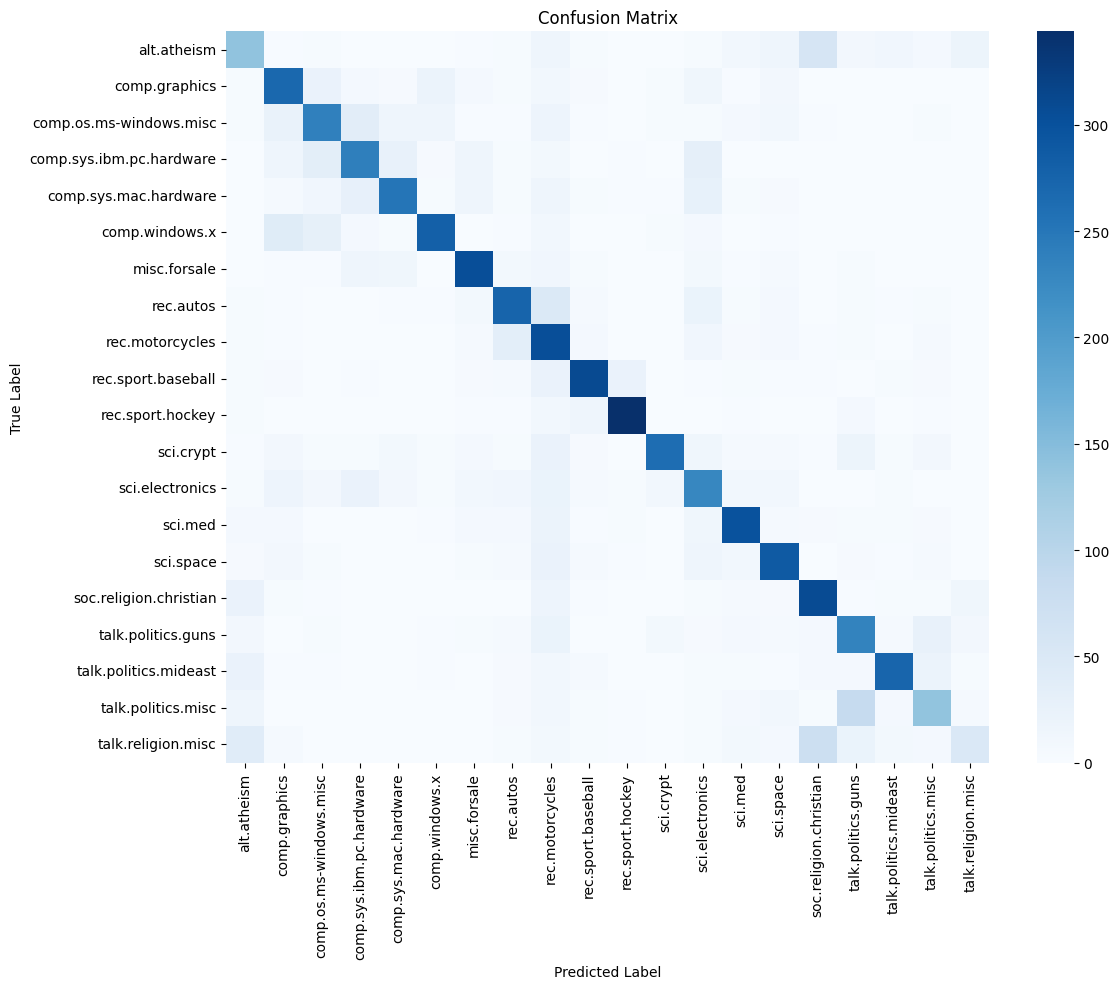

In [2]:
# Single-cell script for 20 Newsgroups classification with Logistic Regression

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Load the data
categories = [
    'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos',
    'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
    'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian',
    'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'
]

newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers','footers','quotes'),
    shuffle=True,
    random_state=42
)
newsgroups_test = fetch_20newsgroups(
    subset='test',
    categories=categories,
    remove=('headers','footers','quotes'),
    shuffle=True,
    random_state=42
)

X_train, y_train = newsgroups_train.data, newsgroups_train.target
X_test,  y_test  = newsgroups_test.data,  newsgroups_test.target

print(f"Loaded {len(X_train)} training documents and {len(X_test)} test documents.")

# 2. Vectorize texts with TF–IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

print("Text data has been vectorized into TF–IDF features.")

# 3. Train Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_tfidf, y_train)
print("Logistic Regression model trained.")

# 4. Predict on test set
y_pred = clf.predict(X_test_tfidf)

# 5. Compute metrics
test_acc  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")

# 6. Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

# 7. Confusion matrix (optional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues', 
            xticklabels=newsgroups_test.target_names, 
            yticklabels=newsgroups_test.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
